In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Groceries_dataset.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

C:\Users\Richa\AppData\Local\Temp\ipykernel_29676\1102450863.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


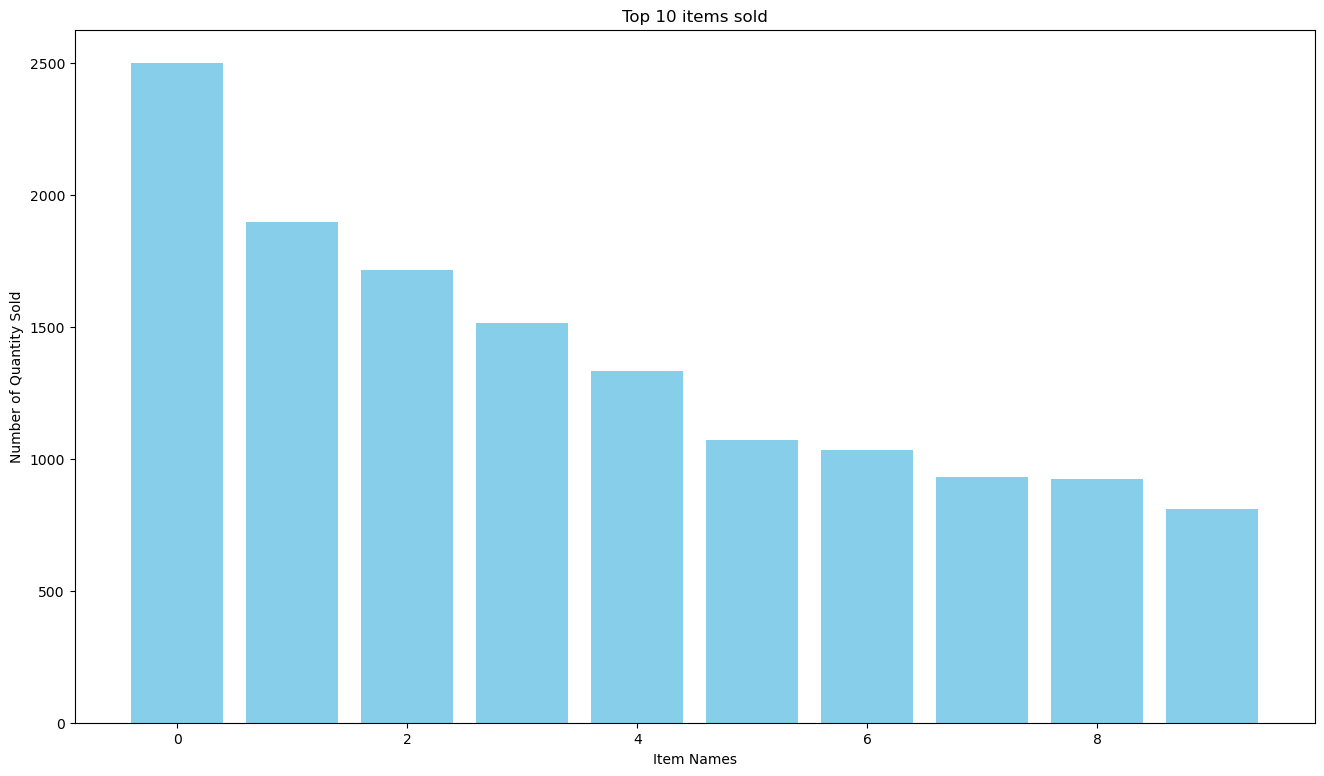

In [14]:
Item_dist = data.groupby(by = 'itemDescription').size().reset_index(name = 'Frequency').sort_values(by = 'Frequency', ascending=False).head(10)

bars = Item_dist['itemDescription']
height = Item_dist['Frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color = 'skyblue')

plt.title("Top 10 items sold")
plt.xlabel("Item Names")
plt.ylabel("Number of Quantity Sold")

plt.show()

In [15]:
data_date = data.set_index(['Date'])

C:\Users\Richa\AppData\Local\Temp\ipykernel_29676\2252199153.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title="Number of items sold").set(xlabel="Date", ylabel = "Number of Item")


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Item')]

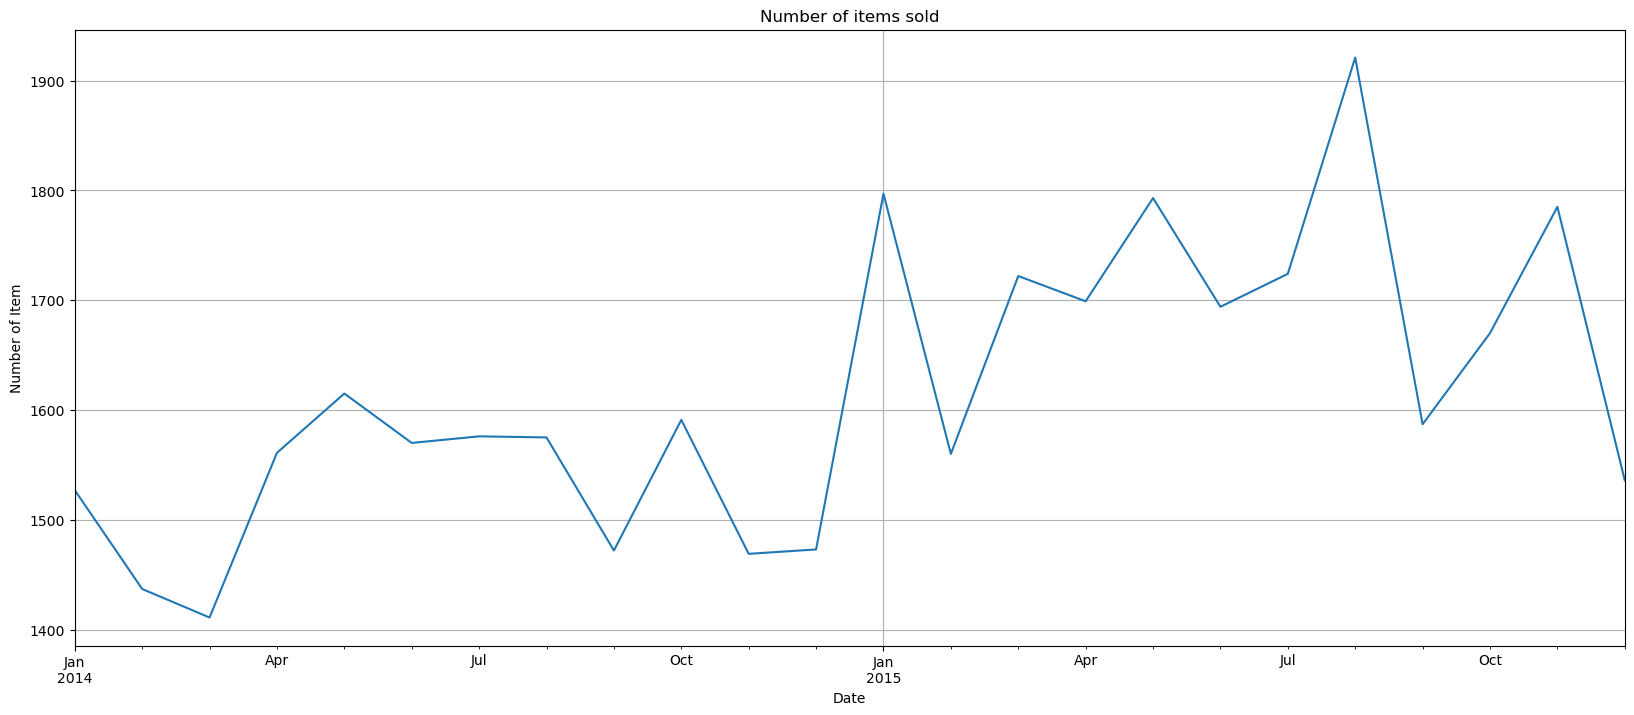

In [16]:
data_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title="Number of items sold").set(xlabel="Date", ylabel = "Number of Item") 

In [17]:
cust_level = data[["Member_number", 'itemDescription']].sort_values(by = "Member_number", ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [18]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [20]:
from apyori import apriori
rules = apriori(transactions=transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)